<a href="https://colab.research.google.com/github/manikur/R-programming/blob/main/Dax_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dax data analysis**

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.7 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=cf6b780119879d9ddf17b258e7dd30e1727b635191b324bab6608e414662b81f
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [5]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import yfinance as yf

In [7]:
DAX = yf.download('^GDAXI',
 start='2010-01-01',
 end='2021-02-26',
 progress=False)

In [8]:
DAX['Returns'] = np.log(DAX['Close'] / DAX['Close'].shift(1))

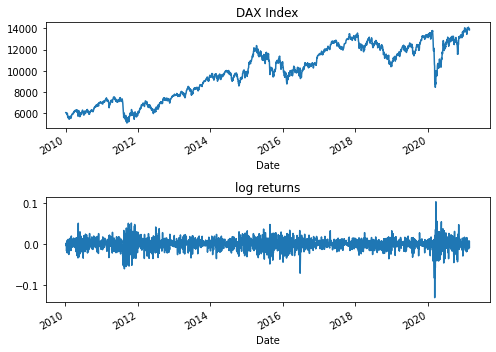

In [9]:
plt.figure(figsize=(7, 5))
plt.subplot(211)
DAX['Adj Close'].plot()
plt.title('DAX Index')
plt.subplot(212)
DAX['Returns'].plot()
plt.title('log returns')
plt.tight_layout()

In [10]:
S0 = DAX['Close'][-1]

In [11]:
vol = np.std(DAX['Returns']) * math.sqrt(252)

In [12]:
r = 0.01

**# Option Parameters**

In [13]:
K = 10000.

In [14]:
T = 1.0

In [15]:
M = 50 # number of time steps
dt = T / M # length of time interval
I = 10000 # number of paths to simulate
np.random.seed(5000) # fixed seed value

In [21]:
# Simulation
S = np.zeros((M + 1, I), dtype=np.float) # array for simulated DAX levels
S[0] = S0 # initial values
for t in xrange(1, M + 1):
ran = np.random.standard_normal(I) # pseudo-random numbers
S[t] = S[t - 1] * np.exp((r - vol ** 2 / 2) * dt
+ vol * math.sqrt(dt) * ran)

IndentationError: ignored

In [22]:
V0 = math.exp(-r * T) * np.sum(np.maximum(S[-1] - K, 0)) / I

In [23]:
h5file = pd.HDFStore('DAX_data.h5')

In [24]:
h5file['DAX'] = DAX

In [25]:
h5file.close()

In [26]:
DAX

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2010-01-04,5975.520020,6048.299805,5974.430176,6048.299805,6048.299805,104344400,NaN
2010-01-05,6043.939941,6058.020020,6015.669922,6031.859863,6031.859863,117572100,-0.002722
2010-01-06,6032.390137,6047.569824,5997.089844,6034.330078,6034.330078,108742400,0.000409
2010-01-07,6016.799805,6037.569824,5961.250000,6019.359863,6019.359863,133704300,-0.002484
2010-01-08,6028.620117,6053.040039,5972.240234,6037.609863,6037.609863,126099000,0.003027
...,...,...,...,...,...,...,...
2021-02-19,13941.400391,14026.179688,13892.719727,13993.230469,13993.230469,72974000,0.007626
2021-02-22,13858.559570,13975.080078,13802.549805,13950.040039,13950.040039,66035300,-0.003091
2021-02-23,13984.980469,13989.240234,13664.709961,13864.809570,13864.809570,88194700,-0.006128


In [28]:
S0

13879.330078125

In [29]:
vol

0.20526795893307773

In [30]:
S

array([[13879.33007812, 13879.33007812, 13879.33007812, ...,
        13879.33007812, 13879.33007812, 13879.33007812],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ]])

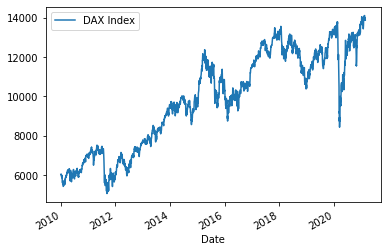

In [31]:
DAX['Close'].plot(label='DAX Index')
plt.legend(loc=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fad6bffe710>,
      dtype=object)

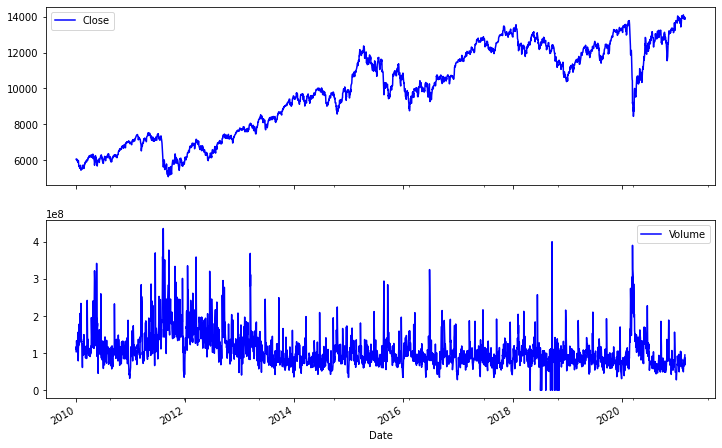

In [32]:
DAX[['Close', 'Volume']].plot(subplots=True, style='b',
figsize=(12, 8))